###### Preprocesado de los dos conjuntos

## Carga de los datos

El preprocesado de los dos conjuntos por separado ha sido bastante sencillo ya que todas las imágenes tenían las mismas dimensiones y no existían ningún problema en particular. Sin embargo, cuando intentamos unirlos se complica bastante. Las características de los dos conjuntos son dispares:

- **Letras**: 
    - Formato de los ficheros ".csv"
    - Tienen como etiqueta un solo número que indica la letra.
    - Tamaño de las imágenes de 28x28.
    - Conjunto global separado en train y test.
    - Más de 20.000 imágenes
    
- **Numeros**:
    - Formato de los ficheros ".npy"
    - Tienen como etiqueta un array cuya posición indica el número.
    - Tamaño de las imágenes de 64x64.
    - Hay dos ficheros: X.npy con todas las imágenes e Y.npy con todas las labels.
    - 2062 imágenes en total.
    
Todas estas diferencias hacen que el preprocesado sea realmente difícil y tedioso. Tenemos que encontrar aquellas características que permitan juntar los dos conjuntos correctamente para que nos de buenos resultados.

In [1]:
import pandas as pd
import numpy as np
import keras as keras

path_npy = "DatasetsIAO/Unido/"

# Estos tienen solo una sola salida. 24x24
df_letras_train = pd.read_csv("DatasetsIAO/Letras/sign_mnist_train.csv")
df_letras_test = pd.read_csv("DatasetsIAO/Letras/sign_mnist_test.csv")

# Estos están en one hot encoding. 64x64
X_numeros = np.load("DatasetsIAO/NumerosBien/X.npy")
Y_numeros = np.load("DatasetsIAO/NumerosBien/Y.npy")

Using TensorFlow backend.
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/fra

#### Preprocesado con distinta proporcion

1. Cambiar Y numeros a solo tener una salida **DONE**
2. Juntar test y train de letras y separar en Y y X **DONE**
3. Reescalar las imagenes de numeros de 64x64 a 28x28 **DONE**
4. Juntar los datos de numeros y los de letras **DONE**
5. Pasar todo el test a one hot encoding **DONE**
6. Separar en train y test. **DONE**

In [2]:
Y_numeros.shape

(2062, 10)

### Transformamos a dataframe el np.array de Numeros

Al igual que hicimos en el preprocesado de los conjuntos de los datos numéricos, vamos a pasar los numpy array obtenidos a partir de los ".npy" para poder manejarlos de una forma mucho más eficiente y sencilla.

In [3]:
# Para manejar los dataset de los números, los pasamos a dataframe

# Hacemos el reshape de X_numeros para que solo tenga dos dimensiones
# y pueda ser representado en un dataframe.
X_numeros = X_numeros.reshape(2062, 4096)

# Pasamos tanto Y_numeros como X_numeros a dataframe.
# Es necesario añadir +1 en los nombres de indice y columnas
# que empiecen con 1 para que cuadre con el número de instancias total.
X_numeros = pd.DataFrame(data = X_numeros,
          index=np.arange(1, X_numeros.shape[0] + 1),
          columns=np.arange(1, X_numeros.shape[1] + 1))

Y_numeros = pd.DataFrame(data = Y_numeros,
          index=np.arange(1, Y_numeros.shape[0] + 1),
          columns=np.arange(0, Y_numeros.shape[1]))


In [4]:
X_numeros

,1,2,3,4,5,6,7,8,9,10,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
1,0.474510,0.462745,0.450980,0.431373,0.419608,0.403922,0.392157,0.380392,0.372549,0.356863,...,0.419608,0.431373,0.439216,0.454902,0.466667,0.478431,0.486274,0.501961,0.509804,0.521569
2,0.537255,0.517647,0.513726,0.501961,0.486274,0.482353,0.474510,0.470588,0.462745,0.454902,...,0.509804,0.517647,0.529412,0.541176,0.552941,0.564706,0.576471,0.588235,0.600000,0.607843
3,0.435294,0.427451,0.415686,0.411765,0.396078,0.388235,0.376471,0.368627,0.364706,0.352941,...,0.529412,0.541176,0.556863,0.568627,0.580392,0.596078,0.611765,0.619608,0.631373,0.639216
4,0.537255,0.647059,0.647059,0.470588,0.486274,0.486274,0.482353,0.478431,0.474510,0.462745,...,0.392157,0.400000,0.407843,0.423529,0.435294,0.450980,0.466667,0.486274,0.501961,0.521569
5,0.305882,0.298039,0.294118,0.286274,0.278431,0.274510,0.266667,0.266667,0.258824,0.254902,...,0.439216,0.450980,0.450980,0.454902,0.458824,0.466667,0.466667,0.474510,0.478431,0.482353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.545098,0.537255,0.525490,0.517647,0.513726,0.501961,0.494118,0.478431,0.462745,0.447059,...,0.564706,0.572549,0.580392,0.588235,0.596078,0.603922,0.607843,0.615686,0.623529,0.627451
2059,0.513726,0.498039,0.490196,0.478431,0.458824,0.450980,0.447059,0.443137,0.431373,0.419608,...,0.427451,0.443137,0.458824,0.470588,0.482353,0.494118,0.501961,0.513726,0.525490,0.529412
2060,0.498039,0.486274,0.470588,0.454902,0.439216,0.427451,0.415686,0.400000,0.388235,0.376471,...,0.537255,0.549020,0.556863,0.564706,0.572549,0.576471,0.580392,0.588235,0.592157,0.619608
2061,0.517647,0.498039,0.486274,0.478431,0.466667,0.450980,0.439216,0.427451,0.407843,0.392157,...,0.454902,0.470588,0.478431,0.486274,0.494118,0.501961,0.513726,0.517647,0.529412,0.537255


### Pasamos de One Hot Encoding a Normal

Pasamos las labels del conjunto de los números de One Hot Encoding a un solo dígito. Esto lo hacemos ya que necesitamos poder juntar el conjunto de datos de las letras con el conjunto de datos de números. Si las labels de uno de los conjuntos están codificadas mediante un array y las del otro están codificadas con un solo número, **no cuadrarían las dimensiones de los dataframe**.

In [5]:
# Cambiamos las salidas que están en one hot encoding
# Sumamos 26 ya que luego va juntar los dos dataset. El número del 0 al 9 serán los números del 26 al 35
Y_numeros['Clase'] = Y_numeros.apply(lambda row: np.argmax(row.values) + 26, axis = 1)

# Eliminamos las columnas en one hot encoding
Y_numeros = Y_numeros.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], axis = 1)
# Renombramos la clase para poder concatenarla posteriormente.
#Y_numeros = Y_numeros.rename(columns={'Clase': 0})
Y_numeros

,Clase
1,26
2,26
3,26
4,26
5,26
...,...
2058,35
2059,35
2060,35
2061,35


### Oversampleamos el conjunto X_numeros

Como ya hemos mencionado al inicio de este documento, la cantidad de imágenes que tenemos en el conjunto de letras es bastante más elevada que la de números. Esto supone un problema bastante típico en la aplicación de redes de neuronas; **las clases no están representadas en igual medida**. Esto no solo hace que las clases poco representadas no puedan generalizar tan bien como las más representadas (debido a los posibles cambios en las imágenes) sino que puede ser que en test tengamos una cantidad de imágenes poco representadas que sea ínfima. ***Esto puede llegar a ocultar la performance verdadera de la red de neuronas.**

Para afrontar este problema, hemos decidido **duplicar imágenes del conjunto de los números**. Rápidamente, cualquiera se puede dar cuenta de que esto es un problema ya que si tenemos un conjunto de entrenamiento con imágenes duplicadas, puede ocurrir que la red se las aprenda y no sea capaz de generalizar. Para combatir este problema, vamos a aplicar **Data Augmentation** al entrenar la red de neuronas. En el siguiente fragmento de código, duplicamos las imágenes de números para que cada clase esté en la misma proporcion que las de letras.

In [6]:
# result: Contiene la imagen del dataframe que no se va a modificar
# y del que se van a ir obteniendo los grupos de imagenes para duplicar.
#
# numerosUnido: Dataframe en el que se van a ir concatenando los numeros
# duplicados.
result = pd.concat([X_numeros, Y_numeros], axis = 1)
numerosUnido = pd.concat([X_numeros, Y_numeros], axis = 1)

clases = list(range(26, 36))
# Iteramos por todas las clases.
for clase in clases:
    # Duplicamos 6 veces cada imagen de cada clase.
    for i in range(6):
        dataframes = [numerosUnido, result[result['Clase'] == clase]]
        numerosUnido = pd.concat(dataframes, ignore_index = True)
        
# Separamos el conjunto de datos en los conjuntos X (imagenes) e Y (labels)
Y_numeros = numerosUnido['Clase']
X_numeros = numerosUnido.drop('Clase', axis=1)

Y_numeros = pd.DataFrame(Y_numeros.rename(columns={'Clase': 0}))

In [7]:
Y_numeros[0].value_counts().sort_index()

26    1435
27    1442
28    1442
29    1442
30    1449
31    1449
32    1449
33    1442
34    1456
35    1428
Name: 0, dtype: int64

### Concatenación de train y test de letras

In [8]:
# Concatenamos los dataframes de las letras (test y train)
dataframes = [df_letras_train, df_letras_test]

# Ponemos ignore_index para que se vuelva a hacer el index desde cero.
dataset_letras = pd.concat(dataframes, ignore_index = True)
dataset_letras

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
34623,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
34624,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
34625,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


### Separación de letras en X e Y

In [9]:
# Dividimos el dataset de las letras en Y y X (labels y data)
Y_letras = dataset_letras['label']
#Y_letras = Y_letras.rename(columns={"label": "Clase"})
X_letras = dataset_letras.drop('label', axis=1)

In [10]:
Y_letras

0         3
1         6
2         2
3         2
4        13
         ..
34622     1
34623    12
34624     2
34625     4
34626     2
Name: label, Length: 34627, dtype: int64

In [11]:
Y_letras.value_counts().sort_index()

0     1457
1     1442
2     1454
3     1441
4     1455
5     1451
6     1438
7     1449
8     1450
10    1445
11    1450
12    1449
13    1442
14    1442
15    1435
16    1443
17    1438
18    1445
19    1434
20    1427
21    1428
22    1431
23    1431
24    1450
Name: label, dtype: int64

### Resize de las imagenes de Numeros a 56x56

Llegados a este punto, tenemos que hacer el **resize de las imágenes**. Lo normal sería pensar que como tenemos imágenes de 28x28 y otras de 64x64, entonces tenemos que hacer más pequeñas las de 64x64. Sin embargo, no vamos a hacer eso ya que creemos que bajar las imágenes a 28x28 hace que **perdamos mucha información** que podemos obtener con 64x64. Además, creemos que las imágenes escaladas a 28x28 desde 64x64 no salen tan bien como nos gustaría, salen demasiado **deformes e indistinguibles**.

En un inicio, pensamos que la mejor forma de no perder información sería mediante la estandarización de todas las imágenes a 64x64. Sin embargo, las imágenes que obtuvimos no eran tan buenas como pensábamos en un inicio. Por ese motivo, decidimos subir las imágenes de 28x28 a 56x56 ya que es una potencia de dos y parece que da mejores resultados. Siguiendo este mismo motivo, las imágenes de 64x64 serán bajadas a 56x56.

Para hacer el downscale de las imágenes vamos a utizar el filtro de interpolación **INTER_LANCZOS4** de la librería **OpenCV**.

In [12]:
# Codigo para hacer resize a 56 de los numeros
imagenesNumeros = X_numeros.to_numpy().reshape(-1, 64, 64)

In [13]:
# Codigo para hacer resize a 56 de los numeros
### import numpy as np
import matplotlib.pyplot as plt
import cv2

newX = []
# Hacemos reshape de todas las imagenes
for img in imagenesNumeros:
    newX.append(cv2.resize(img, dsize=(56, 56), interpolation = cv2.INTER_LANCZOS4))

# Hacemos reshape de las imágenes de nuevo para poder hacer el dataframe
X_numeros = np.asarray(newX).reshape(-1, 3136)

# Volvemos a transformar X_numeros en un dataframe para concatenarlo
X_numeros = pd.DataFrame(data = X_numeros,
          index=np.arange(1, X_numeros.shape[0] + 1),
          columns=np.arange(1, X_numeros.shape[1] + 1))

(14434, 3136)


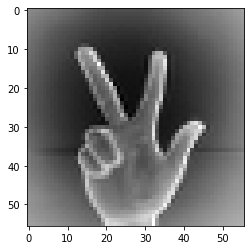

In [14]:
import matplotlib.pyplot as plt
prueba2 = X_numeros.to_numpy().reshape(-1, 56, 56)
print(X_numeros.shape)
plt.imshow(prueba2[720], cmap="gray")

In [15]:
imagenesLetras = X_letras.to_numpy().reshape(-1, 28, 28)

In [16]:
### import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

newX = []
# Hacemos reshape de todas las imagenes
for img in imagenesLetras:
    im = Image.fromarray(img.astype('uint8'), 'L')
    im_resized64 = np.asarray(im.resize((56, 56), resample=Image.LANCZOS))

    
    newX.append(im_resized64)

# Hacemos reshape de las imágenes de nuevo para poder hacer el dataframe
X_letras = np.asarray(newX).reshape(-1, 3136)
X_letras = pd.DataFrame(data = X_letras,
          index=np.arange(1, X_letras.shape[0] + 1),
          columns=np.arange(1, X_letras.shape[1] + 1))

(34627, 3136)


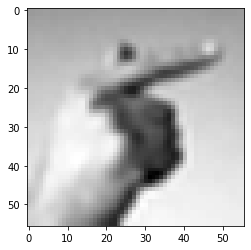

In [17]:
import matplotlib.pyplot as plt
prueba2 = X_letras.to_numpy().reshape(-1, 56, 56)
print(X_letras.shape)
plt.imshow(prueba2[750], cmap="gray")

In [18]:
X_numeros

,1,2,3,4,5,6,7,8,9,10,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136
1,0.473627,0.459714,0.443607,0.424375,0.409242,0.394298,0.380648,0.370898,0.350886,0.335514,...,0.402585,0.416222,0.430198,0.439864,0.457457,0.471017,0.481276,0.496372,0.507788,0.520687
2,0.535806,0.515056,0.511451,0.492979,0.483623,0.476440,0.470951,0.462026,0.452767,0.444129,...,0.492065,0.507138,0.516383,0.529849,0.543025,0.556661,0.570084,0.583560,0.597050,0.606877
3,0.434355,0.423692,0.413902,0.403815,0.390051,0.378784,0.368425,0.363300,0.350030,0.343350,...,0.512534,0.526286,0.539691,0.557727,0.570750,0.584962,0.604104,0.616335,0.628265,0.638398
4,0.545224,0.664872,0.581906,0.462167,0.497384,0.485038,0.480042,0.474147,0.457967,0.437849,...,0.385238,0.390432,0.399099,0.408484,0.426183,0.440085,0.458221,0.479169,0.497847,0.520520
5,0.305451,0.296866,0.291936,0.281508,0.276200,0.267530,0.266737,0.258044,0.254042,0.249517,...,0.437993,0.437517,0.449662,0.450825,0.455494,0.461752,0.466301,0.471042,0.477242,0.481855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14430,0.544778,0.534286,0.521987,0.516710,0.506162,0.495631,0.478982,0.461353,0.442286,0.428293,...,0.552967,0.562434,0.571591,0.580412,0.589217,0.598867,0.605314,0.611894,0.621788,0.626980
14431,0.512619,0.495033,0.487121,0.467953,0.451995,0.447354,0.443293,0.429735,0.416867,0.400989,...,0.408931,0.424127,0.441302,0.459535,0.472489,0.486625,0.497801,0.508478,0.522827,0.528895
14432,0.496833,0.482094,0.464366,0.446403,0.431088,0.418385,0.400535,0.387170,0.373073,0.359453,...,0.520832,0.533251,0.547347,0.556671,0.565794,0.574014,0.577093,0.586226,0.588674,0.617319
14433,0.516280,0.493771,0.483003,0.472822,0.456041,0.440790,0.428091,0.405646,0.388810,0.375431,...,0.435863,0.450875,0.468523,0.478010,0.487361,0.495812,0.507869,0.515608,0.525642,0.536218


In [19]:
# Normalizamos el dataframe de letras, ya que el dataframe de números 
# estaba normalizado y lo vamos a necesitar para entrenar a la red
# de neuronas correctamente.
import pandas as pd
from sklearn import preprocessing

x = X_letras.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# Debemos pasarle el nombre de las nuevas columnas ya que si no
# no se concatenan correctamente.
X_letras = pd.DataFrame(x_scaled, columns=list(range(1,3137)))

In [20]:
X_letras

,1,2,3,4,5,6,7,8,9,10,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136
0,0.415686,0.427451,0.450980,0.474510,0.490196,0.505882,0.521569,0.529412,0.541176,0.549020,...,0.807843,0.807843,0.807843,0.807843,0.800000,0.800000,0.796078,0.796078,0.792157,0.792157
1,0.607843,0.607843,0.615686,0.615686,0.611765,0.611765,0.611765,0.611765,0.611765,0.611765,...,0.584314,0.713725,0.741176,0.627451,0.454902,0.400000,0.498039,0.584314,0.600000,0.596078
2,0.733333,0.733333,0.737255,0.737255,0.737255,0.737255,0.733333,0.733333,0.733333,0.733333,...,0.780392,0.780392,0.780392,0.772549,0.768627,0.760784,0.760784,0.760784,0.764706,0.764706
3,0.827451,0.827451,0.827451,0.827451,0.831373,0.831373,0.831373,0.831373,0.827451,0.827451,...,0.890196,0.886275,0.882353,0.874510,0.862745,0.898039,0.933333,0.831373,0.670588,0.572549
4,0.643137,0.643137,0.650980,0.658824,0.666667,0.666667,0.670588,0.678431,0.686275,0.694118,...,0.647059,0.666667,0.643137,0.631373,0.650980,0.654902,0.650980,0.670588,0.698039,0.713725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,0.537255,0.521569,0.486275,0.450980,0.431373,0.415686,0.400000,0.400000,0.407843,0.419608,...,0.666667,0.745098,0.729412,0.705882,0.698039,0.678431,0.658824,0.643137,0.639216,0.639216
34623,0.615686,0.615686,0.615686,0.623529,0.627451,0.635294,0.639216,0.647059,0.650980,0.650980,...,0.827451,0.827451,0.823529,0.823529,0.823529,0.823529,0.819608,0.819608,0.815686,0.815686
34624,0.745098,0.745098,0.749020,0.749020,0.745098,0.745098,0.749020,0.749020,0.745098,0.745098,...,0.839216,0.831373,0.823529,0.823529,0.827451,0.827451,0.823529,0.819608,0.815686,0.815686
34625,0.784314,0.792157,0.800000,0.807843,0.815686,0.811765,0.811765,0.819608,0.835294,0.843137,...,0.490196,0.313725,0.317647,0.333333,0.282353,0.270588,0.286275,0.282353,0.258824,0.243137


(34627, 56, 56)


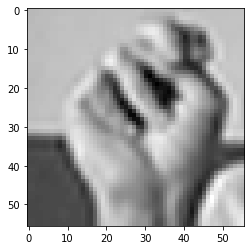

In [21]:
import matplotlib.pyplot as plt
# Hacemos reshape para que pasen de tener una sola dimensión, a tener 2 (de 784 a 28x28).
# Esto es necesario para imprimir la imagen.
prueba2 = X_letras.to_numpy().reshape(-1, 56, 56)
print(prueba2.shape)
plt.imshow(prueba2[1000], cmap="gray")

(14434, 56, 56)


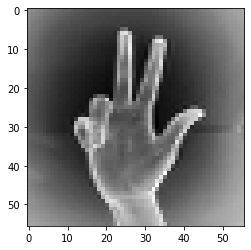

In [22]:
import matplotlib.pyplot as plt
prueba2 = X_numeros.to_numpy().reshape(-1, 56, 56)
print(prueba2.shape)
plt.imshow(prueba2[750], cmap="gray")

## Juntamos los dos dataset y randomizamos las instancias

In [23]:
X_datasetTotal = [X_letras, X_numeros]
Y_datasetTotal = [Y_letras, Y_numeros]

X_datasetTotal = pd.concat(X_datasetTotal, ignore_index = True)
Y_datasetTotal = pd.concat(Y_datasetTotal, ignore_index = True)
Y_datasetTotal = Y_datasetTotal.rename(columns={0: 'Clase'})
Y_datasetTotal

,Clase
0,3
1,6
2,2
3,2
4,13
...,...
49056,35
49057,35
49058,35
49059,35


In [24]:
X_letras = ""
X_numeros = ""
Y_letras = ""
Y_numeros = ""
import gc
gc.collect()

7

In [25]:
# Cada vez que se ejecute esta celda, se obtendrá una aleatorización distinta de los datos.

# Concatenamos las columnas para poder manejarlas mejor al hacer shuffle
result = pd.concat([X_datasetTotal, Y_datasetTotal], axis = 1)

from sklearn.utils import shuffle
# Aleatorizamos las imagenes
result = shuffle(result)

# Volvemos a generar los conjuntos X e Y
X_datasetTotal = result.drop('Clase', axis = 1)
Y_datasetTotal = result['Clase']

X_datasetTotal


,1,2,3,4,5,6,7,8,9,10,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136
40942,0.547194,0.520804,0.508257,0.491590,0.475833,0.460947,0.447308,0.437981,0.424544,0.416093,...,0.552740,0.565747,0.575247,0.588303,0.597032,0.607574,0.619419,0.628208,0.636778,0.649909
4538,0.372549,0.388235,0.423529,0.466667,0.494118,0.517647,0.537255,0.549020,0.560784,0.572549,...,0.345098,0.301961,0.215686,0.164706,0.141176,0.113725,0.066667,0.047059,0.050980,0.054902
12049,0.686275,0.686275,0.690196,0.694118,0.698039,0.698039,0.701961,0.701961,0.701961,0.701961,...,0.772549,0.772549,0.768627,0.768627,0.764706,0.764706,0.760784,0.756863,0.752941,0.752941
15159,0.803922,0.807843,0.815686,0.823529,0.831373,0.831373,0.835294,0.835294,0.843137,0.850980,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
18603,0.596078,0.600000,0.607843,0.615686,0.619608,0.623529,0.631373,0.639216,0.643137,0.647059,...,0.843137,0.843137,0.839216,0.839216,0.839216,0.839216,0.839216,0.835294,0.831373,0.831373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35866,0.445894,0.426132,0.406718,0.393503,0.383412,0.368239,0.349897,0.331922,0.318542,0.304138,...,0.512760,0.525986,0.539363,0.553140,0.562827,0.574872,0.586954,0.604240,0.612819,0.626331
24506,0.517647,0.537255,0.572549,0.607843,0.623529,0.631373,0.650980,0.670588,0.698039,0.717647,...,0.203922,0.290196,0.309804,0.294118,0.270588,0.250980,0.243137,0.239216,0.235294,0.235294
35882,0.595639,0.585890,0.577520,0.567701,0.560664,0.540540,0.526098,0.500568,0.489985,0.470073,...,0.477083,0.477699,0.481752,0.486996,0.497131,0.510923,0.521789,0.528236,0.547801,0.564230
10796,0.564706,0.564706,0.572549,0.580392,0.584314,0.588235,0.592157,0.600000,0.600000,0.607843,...,0.756863,0.733333,0.701961,0.674510,0.654902,0.658824,0.666667,0.643137,0.607843,0.584314


## Preparamos las imágenes y las pasamos a One Hot Encoding

In [26]:
# Hacemos el reshape para que las imagenes tengan el tamaño correcto
X_datasetTotal = X_datasetTotal.values.reshape(X_datasetTotal.shape[0], 56, 56, 1)

from keras.utils.np_utils import to_categorical
Y_datasetTotal = to_categorical(Y_datasetTotal.values)

In [27]:
Y_datasetTotal.shape

(49061, 36)

Hay un total de 36 columnas por los siguientes motivos:

- En total, el alfabeto tiene 26 letras. Hay dos que no podemos clasificar: la j y la z. La z no supone un problema ya que se encuentra al final, por lo que directamente no se tiene en cuenta. La j, al estar en el medio, el dataset se salta la etiqueta que debería tener. Esto hace que aun teniendo 24 etiquetas posibles, el array generado al hacer One Hot Encoding, llegue hasta la posición 25.


- Al elegir las nuevas etiquetas de los números, le sumamos 26 debido a que la última etiqueta de las letras es la 25 (por los motivos recién mencionados). Esto hace que 26 + 10 = 36 que es el número de posibles valores que tenemos.

## Separamos en train y test

Al igual que en los modelos de números y letras en individual, vamos a dividir los conjuntos con las siguientes proporciones:

- Entrenamiento: 60%
- Validación: 20%
- Test: 20%

In [28]:
import math

nInstanciasTrain = math.ceil(0.6 * X_datasetTotal.shape[0])
nInstanciasVal = math.ceil(0.8 * X_datasetTotal.shape[0])

unido_train_X = X_datasetTotal[:nInstanciasTrain]
unido_train_Y = Y_datasetTotal[:nInstanciasTrain]

unido_val_X = X_datasetTotal[nInstanciasTrain:nInstanciasVal]
unido_val_Y = Y_datasetTotal[nInstanciasTrain:nInstanciasVal]

unido_test_X = X_datasetTotal[nInstanciasVal:]
unido_test_Y = Y_datasetTotal[nInstanciasVal:]

In [29]:
print(unido_train_X.shape)
print(unido_train_Y.shape)

print(unido_test_X.shape)
print(unido_test_Y.shape)

print(unido_val_X.shape)
print(unido_val_Y.shape)

(29437, 56, 56, 1)
(29437, 36)
(9812, 56, 56, 1)
(9812, 36)
(9812, 56, 56, 1)
(9812, 36)


## Ejemplos de imágenes generadas

(56, 56)


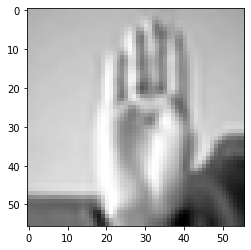

In [30]:
from matplotlib import pyplot as plt

example = unido_train_X[1000].reshape(56, 56)

print(example.shape)
plt.imshow(example, cmap="gray")

(56, 56)


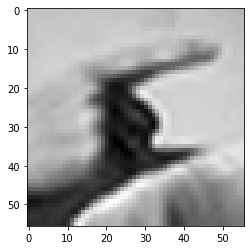

In [31]:
from matplotlib import pyplot as plt

example = unido_val_X[56].reshape(56, 56)

print(example.shape)
plt.imshow(example, cmap="gray")

(56, 56)


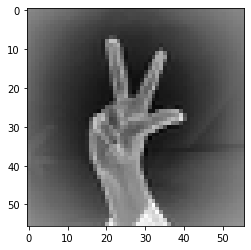

In [32]:
from matplotlib import pyplot as plt
example = unido_train_X[2400].reshape(56, 56)

print(example.shape)
plt.imshow(example, cmap="gray")

In [33]:
np.save(path_npy + "unido_train_X.npy", unido_train_X)
np.save(path_npy + "unido_train_Y.npy", unido_train_Y)
np.save(path_npy + "unido_test_X.npy", unido_test_X)
np.save(path_npy + "unido_test_Y.npy", unido_test_Y)
np.save(path_npy + "unido_val_X.npy", unido_val_X)
np.save(path_npy + "unido_val_Y.npy", unido_val_Y)